In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/영우_4기_딥러닝/dataset/test.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int64
 1   B       10 non-null     int64
 2   C       10 non-null     int64
 3   D       10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes
None


In [4]:
a = data['D']

In [6]:
x_data = data.copy()
y_data = x_data.pop("D")

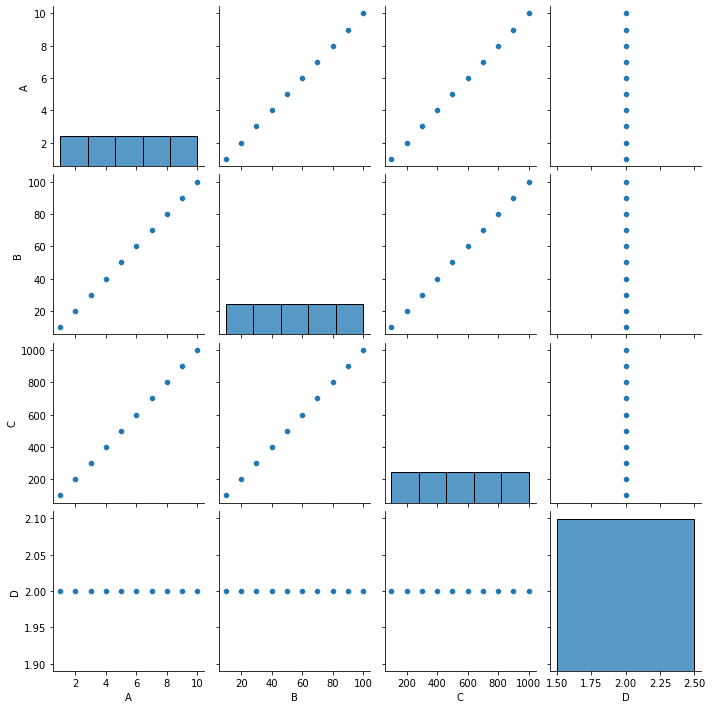

In [7]:
# 데이터 분포도 확인하기
sns.pairplot(data[["A","B","C","D"]], diag_kind='hist')
plt.show()

In [8]:
# data의 min, max, mean, std값 구하기
dataset_stats = data.describe()
dataset_stats = dataset_stats.transpose()
#data.min()
#data.max()
#data.mean()

In [9]:
## data normalization
def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

def standard_norm(x):
  return (x - dataset_stats['mean']) / dataset_stats['std']

In [10]:
min_max_norm_train_data = min_max_norm(data)
standard_norm_train_data = standard_norm(data)

In [11]:
print("min max : ")
print(min_max_norm_train_data)
print("standard :")
print(standard_norm_train_data)

min max : 
          A         B         C   D
0  0.000000  0.000000  0.000000 NaN
1  0.111111  0.111111  0.111111 NaN
2  0.222222  0.222222  0.222222 NaN
3  0.333333  0.333333  0.333333 NaN
4  0.444444  0.444444  0.444444 NaN
5  0.555556  0.555556  0.555556 NaN
6  0.666667  0.666667  0.666667 NaN
7  0.777778  0.777778  0.777778 NaN
8  0.888889  0.888889  0.888889 NaN
9  1.000000  1.000000  1.000000 NaN
standard :
          A         B         C   D
0 -1.486301 -1.486301 -1.486301 NaN
1 -1.156012 -1.156012 -1.156012 NaN
2 -0.825723 -0.825723 -0.825723 NaN
3 -0.495434 -0.495434 -0.495434 NaN
4 -0.165145 -0.165145 -0.165145 NaN
5  0.165145  0.165145  0.165145 NaN
6  0.495434  0.495434  0.495434 NaN
7  0.825723  0.825723  0.825723 NaN
8  1.156012  1.156012  1.156012 NaN
9  1.486301  1.486301  1.486301 NaN


# Boston Housing with Normalization

In [14]:
data = pd.read_csv('/content/drive/MyDrive/영우_4기_딥러닝/dataset/BostonHousing.csv')

In [15]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6

In [16]:
x_data = data.copy()
y_data = data.pop('MEDV')

In [17]:
dataset_stats = data.describe()
dataset_stats = dataset_stats.transpose()

In [18]:
## data normalization
def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

def standard_norm(x):
  return (x - dataset_stats['mean']) / dataset_stats['std']

In [20]:
import tensorflow as tf
input_layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
output_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [21]:
loss = tf.keras.losses.mean_squared_error
optimizer = tf.keras.optimizers.SGD(learning_rate=0.007)
metrics = tf.keras.metrics.RootMeanSquaredError()

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

In [22]:
result = model.fit(normed_train_data, y_data, epochs = 1000, batch_size=100)

NameError: ignored

In [23]:
normed_train_data = standard_norm(data)

In [24]:
result = model.fit(normed_train_data, y_data, epochs = 1000, batch_size=100)

Epoch 1/1000
6/6 [==============================] - 1s 5ms/step - loss: 198.3853 - root_mean_squared_error: 14.0849
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 100.3867 - root_mean_squared_error: 10.0193
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 86.4021 - root_mean_squared_error: 9.2953
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step - loss: 87.4732 - root_mean_squared_error: 9.3527
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 87.3465 - root_mean_squared_error: 9.3459
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 84.7332 - root_mean_squared_error: 9.2051
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 97.0356 - root_mean_squared_error: 9.8507
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 85.2747 - root_mean_squared_error: 9.2344
Epoch 9/1000
6/6 [==============================] - 0s 5ms/step - loss: 86.8616 - ro

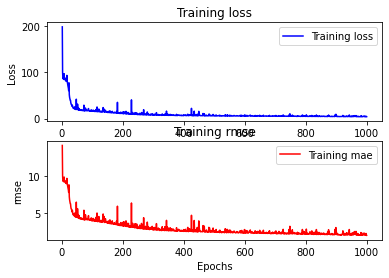

In [25]:
loss = result.history['loss']

# loss 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

# mae그래프
plt.subplot(212)
plt.plot(epochs, mae, 'r-', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [26]:
print("\ Test rmse : %.4f" % (model.evaluate(normed_train_data, y_data)[1]))

16/16 [==============================] - 0s 2ms/step - loss: 4.0227 - root_mean_squared_error: 2.0057
\ Test rmse : 2.0057
